In [2]:
import numpy as np
import pandas as pd
import pymongo

In [3]:
oscar_df = pd.read_csv('../../dataset/the_oscar_awards.csv')
oscar_df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10884,2023,2024,96,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


In [4]:
oscar_df.dtypes

year_film         int64
year_ceremony     int64
ceremony          int64
category         object
name             object
film             object
winner             bool
dtype: object

In [5]:
oscar_df['category'] = oscar_df['category'].astype(pd.StringDtype())
oscar_df['name'] = oscar_df['name'].astype(pd.StringDtype())
oscar_df['film'] = oscar_df['film'].astype(pd.StringDtype())

In [6]:
oscar_df.dtypes

year_film                 int64
year_ceremony             int64
ceremony                  int64
category         string[python]
name             string[python]
film             string[python]
winner                     bool
dtype: object

In [7]:
oscar_df.loc[oscar_df.isna().any(axis=1)]

,year_film,year_ceremony,ceremony,category,name,film,winner
16,1927,1928,1,ENGINEERING EFFECTS,Ralph Hammeras,<NA>,False
18,1927,1928,1,ENGINEERING EFFECTS,Nugent Slaughter,<NA>,False
31,1927,1928,1,WRITING (Title Writing),Joseph Farnham,<NA>,True
32,1927,1928,1,WRITING (Title Writing),"George Marion, Jr.",<NA>,False
33,1927,1928,1,SPECIAL AWARD,Warner Bros.,<NA>,True
...,...,...,...,...,...,...,...
10763,2022,2023,95,GORDON E. SAWYER AWARD,Iain Neil,<NA>,True
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,<NA>,<NA>,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",<NA>,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",<NA>,True


In [8]:
#oscar_df = oscar_df.loc[~oscar_df.isna().any(axis=1)].copy()

In [9]:
oscar_df.loc[oscar_df.duplicated(subset=['category','name','film']) & ~oscar_df['film'].isna()]

,year_film,year_ceremony,ceremony,category,name,film,winner
6220,1983,1984,56,MUSIC (Original Song),Music by Michel Legrand; Lyric by Alan Bergman...,Yentl,False
6854,1989,1990,62,MUSIC (Original Song),Music by Alan Menken; Lyric by Howard Ashman,The Little Mermaid,True
7067,1991,1992,64,MUSIC (Original Song),Music by Alan Menken; Lyric by Howard Ashman,Beauty and the Beast,True
7068,1991,1992,64,MUSIC (Original Song),Music by Alan Menken; Lyric by Howard Ashman,Beauty and the Beast,False
7394,1994,1995,67,MUSIC (Original Song),Music by Elton John; Lyric by Tim Rice,The Lion King,False
7395,1994,1995,67,MUSIC (Original Song),Music by Elton John; Lyric by Tim Rice,The Lion King,False
8864,2007,2008,80,MUSIC (Original Song),Music by Alan Menken; Lyric by Stephen Schwartz,Enchanted,False
8865,2007,2008,80,MUSIC (Original Song),Music by Alan Menken; Lyric by Stephen Schwartz,Enchanted,False
9091,2009,2010,82,MUSIC (Original Song),Music and Lyric by Randy Newman,The Princess and the Frog,False
9959,2016,2017,89,MUSIC (Original Song),Music by Justin Hurwitz; Lyric by Benj Pasek a...,La La Land,True


In [10]:
oscar_df = oscar_df.loc[~oscar_df.duplicated(subset=['category','name','film']) & ~oscar_df['film'].isna()]

In [11]:
oscar_df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10880,2023,2024,96,WRITING (Original Screenplay),Screenplay - Justine Triet and Arthur Harari,Anatomy of a Fall,True
10881,2023,2024,96,WRITING (Original Screenplay),Written by David Hemingson,The Holdovers,False
10882,2023,2024,96,WRITING (Original Screenplay),Written by Bradley Cooper & Josh Singer,Maestro,False
10883,2023,2024,96,WRITING (Original Screenplay),Screenplay by Samy Burch; Story by Samy Burch ...,May December,False


In [12]:
oscar_df = oscar_df.replace({np.nan: None})

In [13]:
oscar_grouped = []
for movie , group in oscar_df.groupby('film'):
    oscars = group.apply(lambda row:{
        "year_film": row['year_film'],
        "year_ceremony": row['year_ceremony'],
        "ceremony": row['ceremony'],
        "category": row['category'],
        "name": row['name'],
        "film": row['film'],
        "winner": row['winner'],
    }, axis=1).tolist()

    oscar_grouped.append({
        "movie_title" : movie ,
        "oscars" : oscars
    })

In [14]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["RT_reviews_oscars"]
mycol = mydb["Oscars"]
mycol.insert_many(oscar_grouped)

KeyboardInterrupt: 

In [15]:
# Conta quante categorie uniche ci sono nella colonna 'category'
num_unique_categories = oscar_df['category'].nunique()
print(f"Numero di categorie uniche: {num_unique_categories}")

Numero di categorie uniche: 107


# Data Analysis

## 2.4 Oscar Dataframe Analysis

#### 2.4.1 Here we list the films that have achieved the most wins and we will correlate them with the nominations.

In [38]:
df_winners = oscar_df[oscar_df['winner'] == True]
oscar_counts = df_winners['film'].value_counts()
most_oscar_wins = oscar_counts.idxmax()
most_oscar_wins_count = oscar_counts.max()
print(f"The movie with the most Oscars is '{most_oscar_wins}' with {most_oscar_wins_count} Oscar.")

The movie with the most Oscars is 'Titanic' with 12 Oscar.


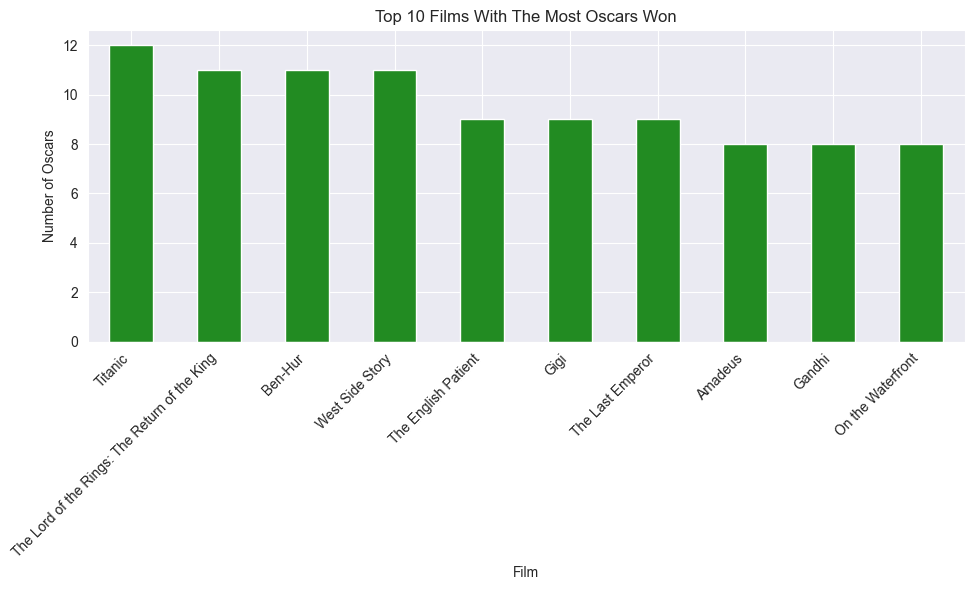

In [43]:
import matplotlib.pyplot as plt
top_10_films = oscar_counts.head(10)
plt.figure(figsize=(10,6))
top_10_films.plot(kind='bar', color='forestgreen')
plt.title('Top 10 Films With The Most Oscars Won')
plt.xlabel('Film')
plt.ylabel('Number of Oscars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [55]:
df_winners_and_nominees = oscar_df[oscar_df['winner'].isin([True, False])]
nominee_counts = df_winners_and_nominees[df_winners_and_nominees['winner'] == False]['film'].value_counts()
winner_counts = df_winners_and_nominees[df_winners_and_nominees['winner'] == True]['film'].value_counts()
top_10_films = nominee_counts.add(winner_counts, fill_value=0).sort_values(ascending=False).head(10)

nominee_and_winner_counts = pd.DataFrame({
    'Nominations': nominee_counts[top_10_films.index],
    'Wins': winner_counts[top_10_films.index]
})

print(nominee_and_winner_counts)

                                     Nominations  Wins
film                                                  
A Star Is Born                                22     3
West Side Story                                7    11
Titanic                                        4    12
Mutiny on the Bounty                          14     1
Moulin Rouge                                  11     4
Cleopatra                                      9     5
Little Women                                  11     3
All about Eve                                  8     6
The Curious Case of Benjamin Button           10     3
La La Land                                     8     5


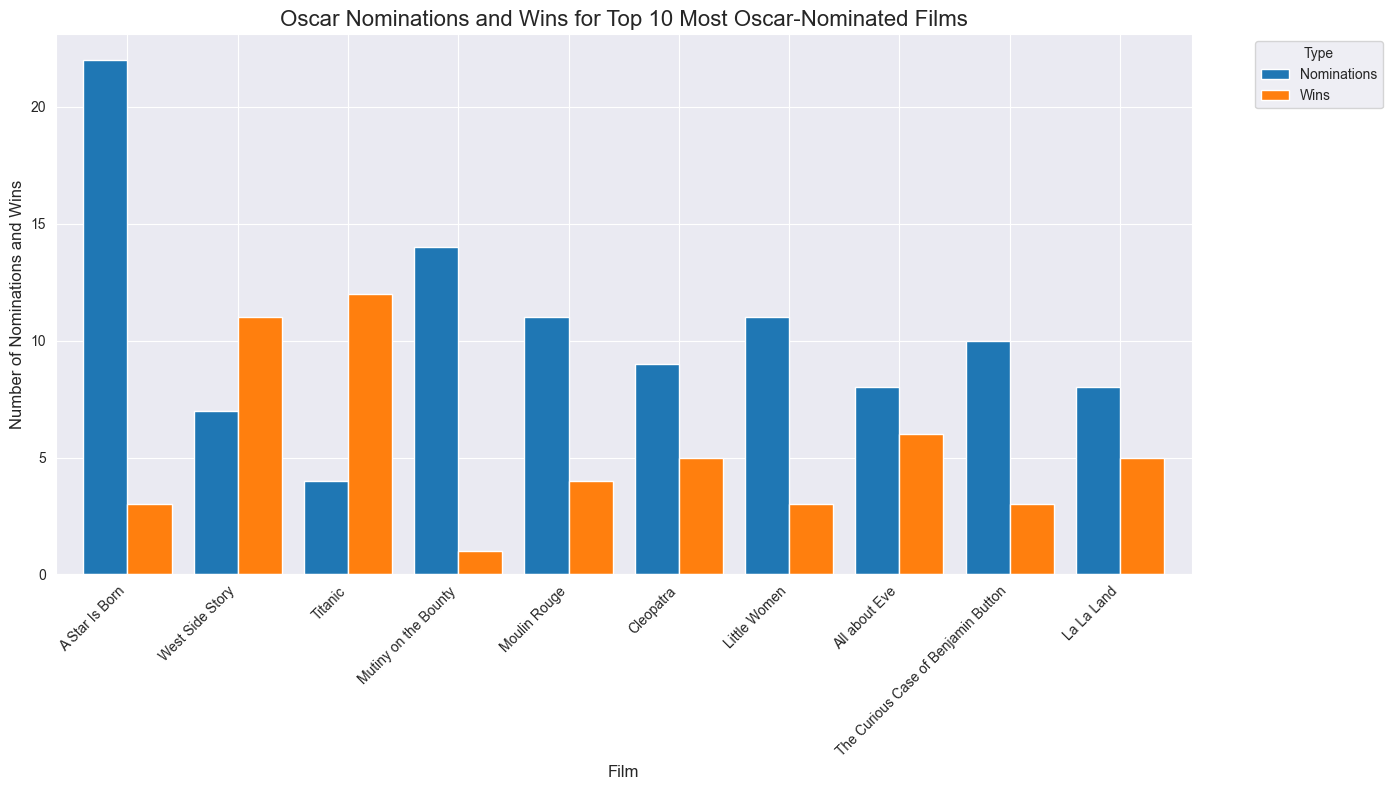

In [56]:
nominee_and_winner_counts.plot(kind='bar', figsize=(14,8), width=0.8)

plt.title('Oscar Nominations and Wins for Top 10 Most Oscar-Nominated Films', fontsize=16)
plt.xlabel('Film', fontsize=12)
plt.ylabel('Number of Nominations and Wins', fontsize=12)

plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

##### From this graph we can conclude that there is no relationship between nominations and victories.

#### 2.4.2 Here we will analyze the films that have obtained the most nominations and we will see if it is thanks to the actors/actresses or thanks to the work of direction and editing.

In [40]:
film_nomination_counts = oscar_df['film'].value_counts()
most_nominated_film = film_nomination_counts.idxmax()
most_nominated_count = film_nomination_counts.max()
print(f"The most nominated film is '{most_nominated_film}' with {most_nominated_count} nomination.")

The most nominated film is 'A Star Is Born' with 25 nomination.


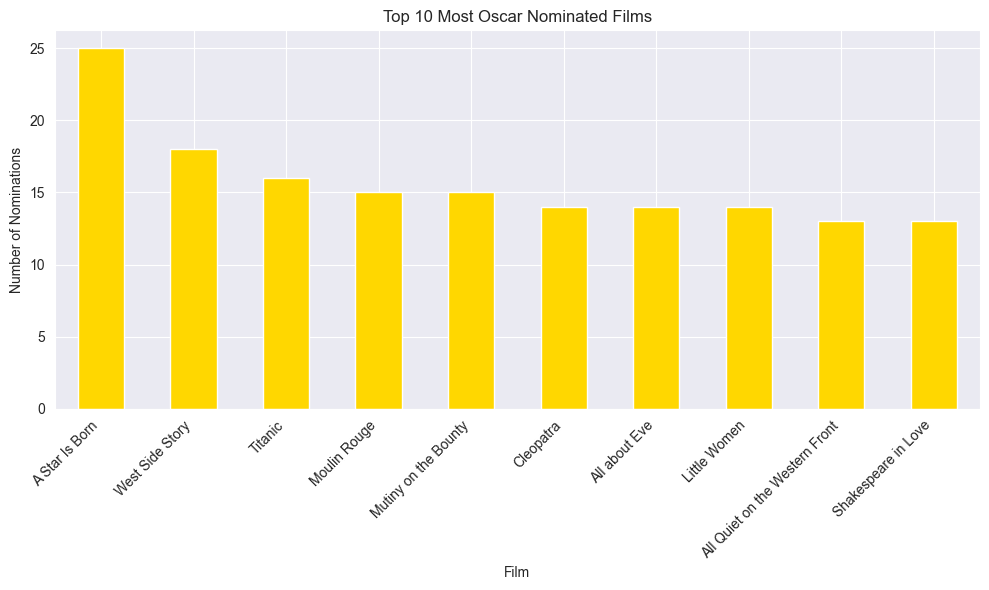

In [42]:
top_10_nominee_films = film_nomination_counts.head(10)
plt.figure(figsize=(10,6))
top_10_nominee_films.plot(kind='bar', color='gold')
plt.title('Top 10 Most Oscar Nominated Films')
plt.xlabel('Film')
plt.ylabel('Number of Nominations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
film_nomination_counts = oscar_df['film'].value_counts()
top_10_nominee_films = film_nomination_counts.head(10)
top_10_data = oscar_df[oscar_df['film'].isin(top_10_nominee_films.index)]
categories_of_interest = ['ACTOR', 'ACTRESS', 'DIRECTING', 'FILM EDITING']
filtered_data = top_10_data[top_10_data['category'].isin(categories_of_interest)]
category_counts = filtered_data.groupby(['film', 'category']).size().unstack(fill_value=0)
category_counts = category_counts[['ACTOR', 'ACTRESS', 'DIRECTING', 'FILM EDITING']]
print(category_counts)

category                        ACTOR  ACTRESS  DIRECTING  FILM EDITING
film                                                                   
A Star Is Born                      2        2          1             0
All Quiet on the Western Front      0        0          1             0
All about Eve                       0        2          1             1
Cleopatra                           1        0          0             2
Little Women                        0        0          1             0
Moulin Rouge                        1        0          1             2
Mutiny on the Bounty                3        0          1             2
Shakespeare in Love                 0        0          1             1
Titanic                             0        0          1             1
West Side Story                     0        0          2             1


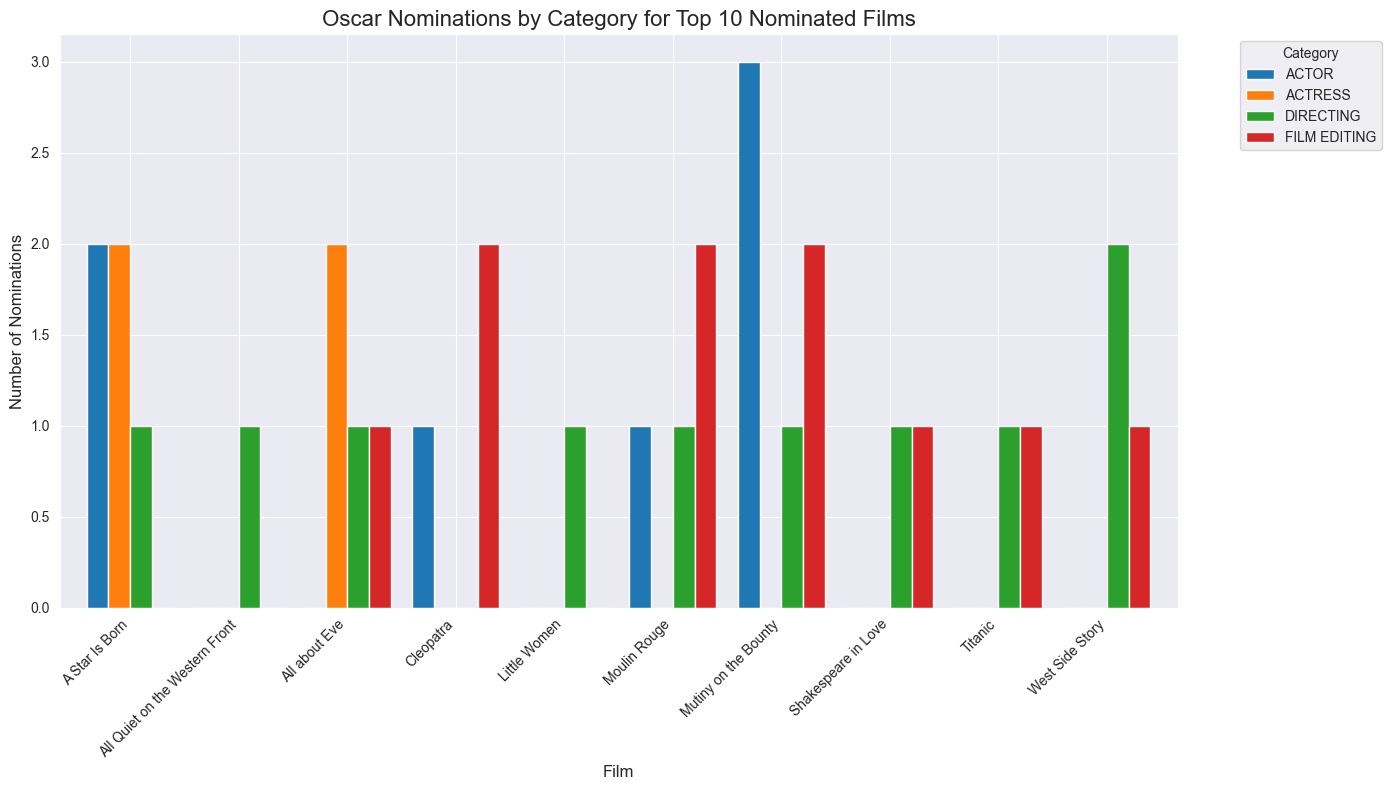

In [51]:
import matplotlib.pyplot as plt

category_counts.plot(kind='bar', figsize=(14,8), width=0.8)

plt.title('Oscar Nominations by Category for Top 10 Nominated Films', fontsize=16)
plt.xlabel('Film', fontsize=12)
plt.ylabel('Number of Nominations', fontsize=12)

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

##### From the graph we can conclude that the nominations were thanks to the direction and the editing: in almost every film the value is at least 1 of both.

#### 2.4.3 here we will analyze the actors/actresses who have won the most nominations with those who have obtained the most victories, to see if there is a correlation.

In [50]:
actors_df = oscar_df[oscar_df['category'].isin(['ACTOR', 'ACTRESS'])]
actor_nomination_counts = actors_df['name'].value_counts()
top_10_actors = actor_nomination_counts.head(10)

print(top_10_actors)

name
Katharine Hepburn    11
Bette Davis          11
Spencer Tracy         9
Laurence Olivier      7
Greer Garson          7
Marlon Brando         7
Paul Muni             6
Deborah Kerr          6
Norma Shearer         6
Fredric March         5
Name: count, dtype: Int64


In [21]:
winners_df = oscar_df[(oscar_df['category'].isin(['ACTOR', 'ACTRESS'])) & (oscar_df['winner'] == True)]
winner_nomination_counts = winners_df['name'].value_counts()
top_10_winners = winner_nomination_counts.head(10)
print(top_10_winners)

name
Katharine Hepburn    3
Bette Davis          2
Luise Rainer         2
Fredric March        2
Spencer Tracy        2
Ingrid Bergman       2
Glenda Jackson       2
Elizabeth Taylor     2
Marlon Brando        2
Gary Cooper          2
Name: count, dtype: Int64


In [58]:
actors_df = oscar_df[oscar_df['category'].isin(['ACTOR', 'ACTRESS'])]
actor_nomination_counts = actors_df['name'].value_counts()
top_10_actors_by_nomination = actor_nomination_counts.head(10)
winners_df = oscar_df[(oscar_df['category'].isin(['ACTOR', 'ACTRESS'])) & (oscar_df['winner'] == True)]

winner_nomination_counts = winners_df['name'].value_counts()
top_10_actors_by_win = winner_nomination_counts.head(10)

top_10_actors_combined = pd.DataFrame({
    'Nominations': actor_nomination_counts.loc[top_10_actors_by_nomination.index],
    'Wins': winner_nomination_counts.loc[top_10_actors_by_win.index]
}).fillna(0)
print(top_10_actors_combined)

                   Nominations  Wins
name                                
Bette Davis                 11     2
Deborah Kerr                 6     0
Elizabeth Taylor             0     2
Fredric March                5     2
Gary Cooper                  0     2
Glenda Jackson               0     2
Greer Garson                 7     0
Ingrid Bergman               0     2
Katharine Hepburn           11     3
Laurence Olivier             7     0
Luise Rainer                 0     2
Marlon Brando                7     2
Norma Shearer                6     0
Paul Muni                    6     0
Spencer Tracy                9     2


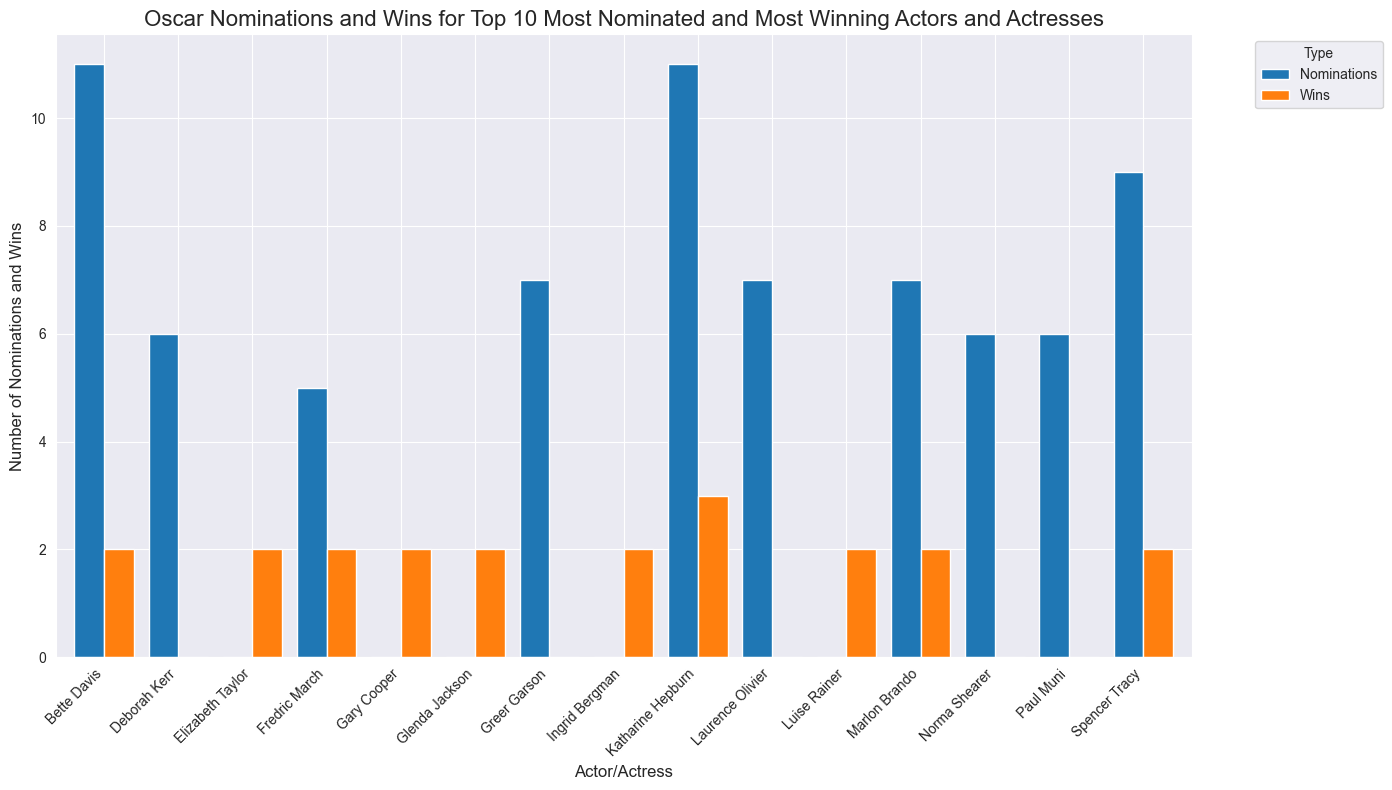

In [59]:
top_10_actors_combined.plot(kind='bar', figsize=(14,8), width=0.8)
plt.title('Oscar Nominations and Wins for Top 10 Most Nominated and Most Winning Actors and Actresses', fontsize=16)
plt.xlabel('Actor/Actress', fontsize=12)
plt.ylabel('Number of Nominations and Wins', fontsize=12)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

##### we can see from the graph that there is no correlation, many actors have several nominations but no wins and the same thing the other way around.

#### 2.4.4 Analysis of the period in which ceremonies are valued most.

In [22]:
winners_df = oscar_df[oscar_df['winner'] == True]
ceremony_counts = winners_df.groupby(['ceremony', 'year_ceremony']).size()
top_10_ceremonies = ceremony_counts.sort_values(ascending=False).head(10)
print(top_10_ceremonies)

ceremony  year_ceremony
29        1957             27
22        1950             27
15        1943             26
25        1953             26
23        1951             26
24        1952             26
27        1955             26
26        1954             26
28        1956             26
38        1966             26
dtype: int64


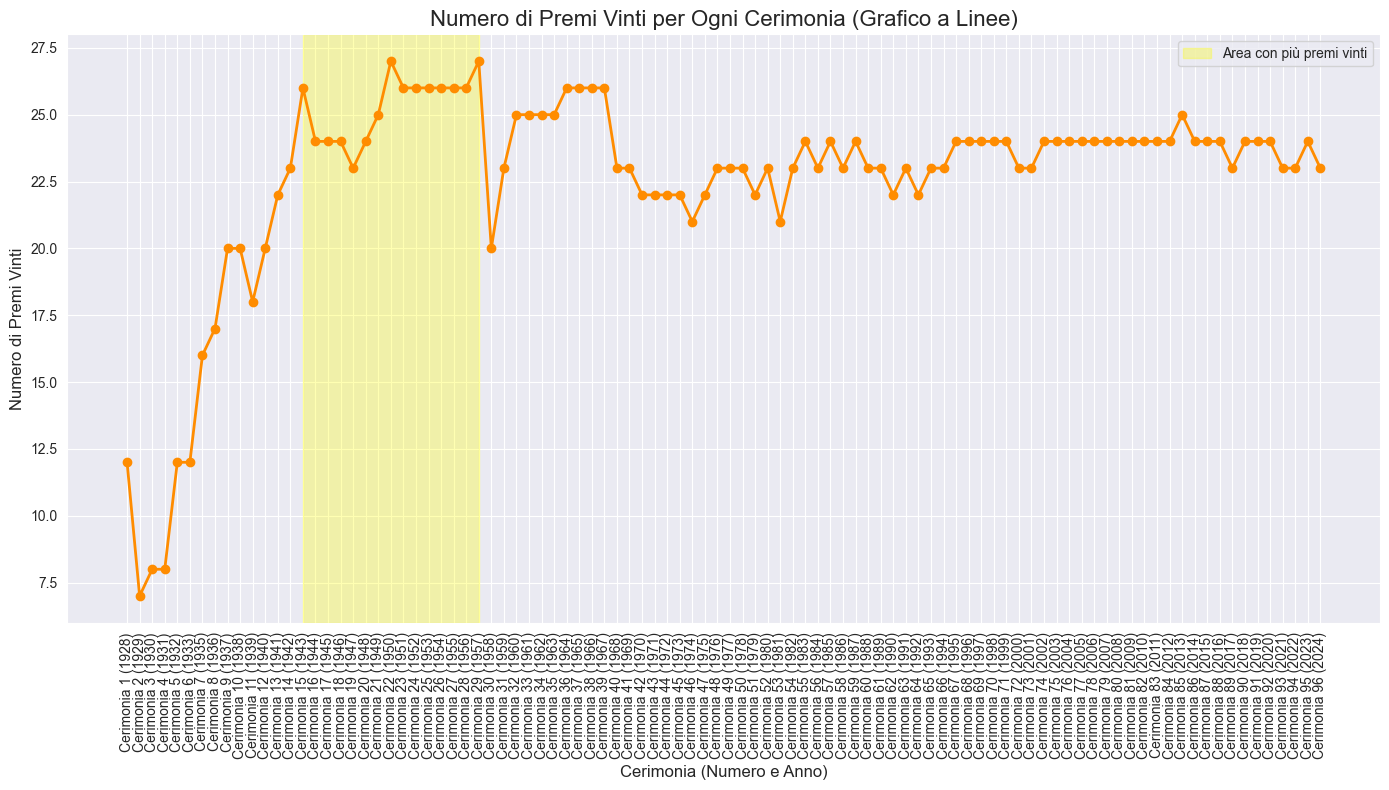

In [68]:
plt.figure(figsize=(14,8))
ceremony_counts.plot(kind='line', marker='o', color='darkorange', linestyle='-', linewidth=2)

plt.title('Numero di Premi Vinti per Ogni Cerimonia (Grafico a Linee)', fontsize=16)
plt.xlabel('Cerimonia (Numero e Anno)', fontsize=12)
plt.ylabel('Numero di Premi Vinti', fontsize=12)

plt.xticks(ticks=range(len(ceremony_counts)),
           labels=[f"Cerimonia {i[0]} ({i[1]})" for i in ceremony_counts.index],
           rotation=90, ha='center')

highlight_years = [(i, j) for i, j in ceremony_counts.index if 1942 <= j <= 1956]
highlight_indices = [i for i, j in ceremony_counts.index if 1942 <= j <= 1956]
plt.axvspan(min(highlight_indices), max(highlight_indices), color='yellow', alpha=0.3, label='Area con più premi vinti')

plt.tight_layout()
plt.legend()
plt.show()

##### This graph shows that the ceremonies that received the most Oscars were in the period between 1943 and 1957.

#### 2.4.5 Analysis of the most influential author within the most significant category.

In [25]:
top_categories = oscar_df['category'].value_counts().head(10)
print(top_categories)

category
DIRECTING                       469
FILM EDITING                    450
ACTRESS IN A SUPPORTING ROLE    440
ACTOR IN A SUPPORTING ROLE      440
DOCUMENTARY (Short Subject)     378
BEST PICTURE                    371
DOCUMENTARY (Feature)           345
CINEMATOGRAPHY                  338
FOREIGN LANGUAGE FILM           315
ART DIRECTION                   307
Name: count, dtype: Int64


In [32]:
directing_data = oscar_df[oscar_df['category'] == 'DIRECTING']
top_names = directing_data['name'].value_counts().head(10)
top_names_df = top_names.reset_index()
top_names_df.columns = ['name', 'count']
print(top_names_df)

               name  count
0     William Wyler     12
1   Martin Scorsese     10
2  Steven Spielberg      9
3      Billy Wilder      8
4       Woody Allen      7
5        David Lean      7
6    Fred Zinnemann      7
7       Frank Capra      6
8  Alfred Hitchcock      5
9    Michael Curtiz      5


In [33]:
wyler_films = oscar_df[oscar_df['name'] == 'William Wyler']
unique_films = wyler_films['film'].unique()
print("Films made by William Wyler:")
for film in unique_films:
    print(f"- {film}")

Film fatti da William Wyler:
- Dodsworth
- Wuthering Heights
- The Letter
- The Little Foxes
- Mrs. Miniver
- The Best Years of Our Lives
- The Heiress
- Detective Story
- Roman Holiday
- Friendly Persuasion
- Ben-Hur
- The Collector


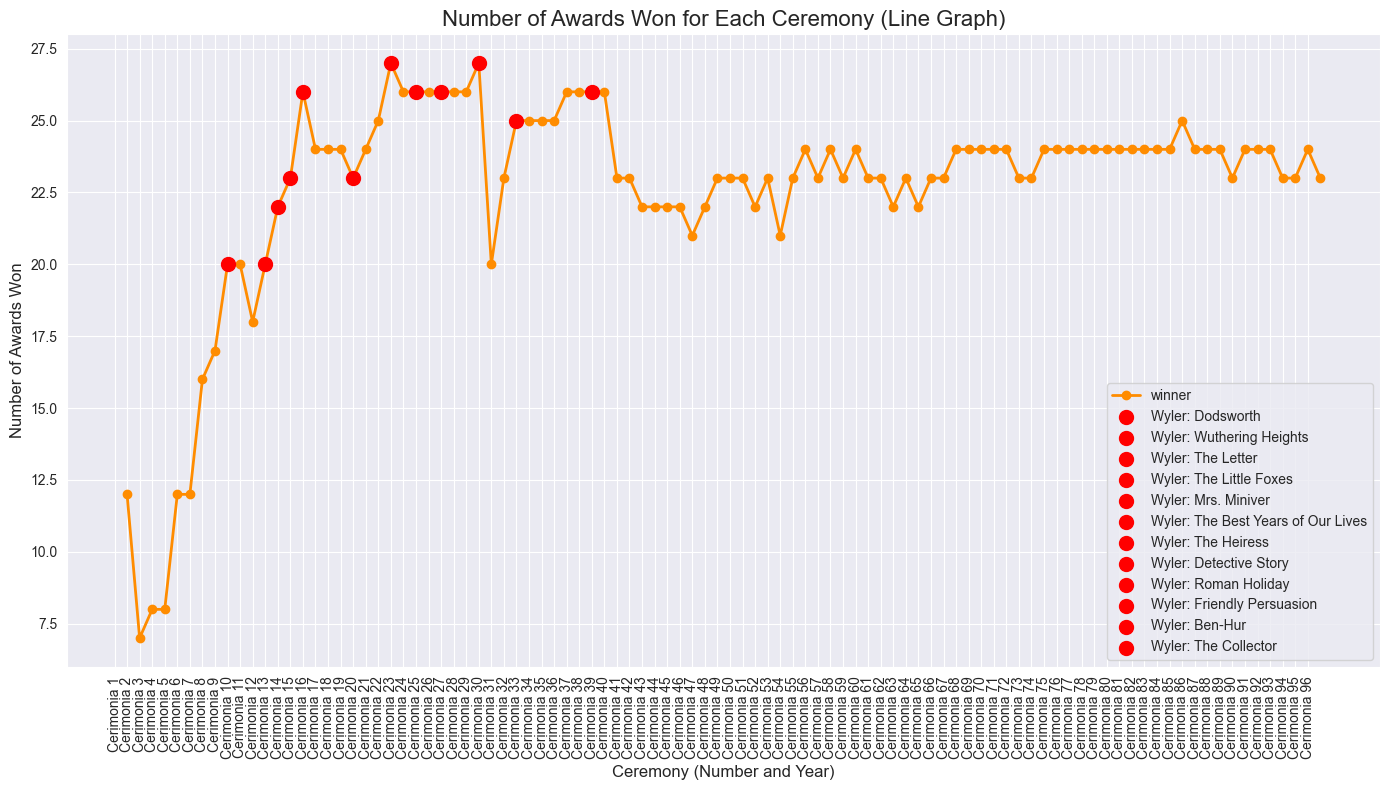

In [69]:
wyler_films = oscar_df[oscar_df['name'] == 'William Wyler']
ceremony_counts = oscar_df.groupby('ceremony')['winner'].sum()
plt.figure(figsize=(14,8))
ceremony_counts.plot(kind='line', marker='o', color='darkorange', linestyle='-', linewidth=2)
plt.title('Number of Awards Won for Each Ceremony (Line Graph)', fontsize=16)
plt.xlabel('Ceremony (Number and Year)', fontsize=12)
plt.ylabel('Number of Awards Won', fontsize=12)
plt.xticks(ticks=range(len(ceremony_counts)),
           labels=[f"Cerimonia {i}" for i in ceremony_counts.index],
           rotation=90, ha='center')

for ceremony in ceremony_counts.index:
    wyler_in_ceremony = wyler_films[wyler_films['ceremony'] == ceremony]
    if not wyler_in_ceremony.empty:
        for film in wyler_in_ceremony['film'].unique():
            film_popularity = ceremony_counts[ceremony]
            plt.scatter(ceremony, film_popularity, color='red', s=100, zorder=5, label=f"Wyler: {film}" if 'Wyler' not in plt.gca().get_legend_handles_labels()[1] else "")

plt.legend()
plt.tight_layout()
plt.show()

##### From the graph we can conclude that an author who has been awarded for several films has contributed significantly to the film industry, since his films have not only won numerous awards, but are also among the most awarded ever, indicating a recognized and constant quality over time.